In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset (replace 'path_to_data' with the actual file path)
df = pd.read_csv("/content/raw_df.csv")

# Display the first few rows
df.head()



,EmployeeID,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,No,Travel_Rarely,Sales,6,College,Life Sciences,Female,1,Healthcare Representative,...,11,0,1.0,6,1,0,0,High,Very High,Good
1,2,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,Female,1,Research Scientist,...,23,1,6.0,3,5,1,4,High,Medium,Best
2,3,No,Travel_Frequently,Research & Development,17,Master,Other,Male,4,Sales Executive,...,15,3,5.0,2,5,0,3,Medium,Medium,Bad
3,4,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,Male,3,Human Resources,...,11,3,13.0,5,8,7,5,Very High,Very High,Better
4,5,No,Travel_Rarely,Research & Development,10,Below College,Medical,Male,1,Sales Executive,...,12,2,9.0,2,6,0,4,Very High,Low,Better


Total Attrited Employees: 711
Total Non-Attrited Employees: 3699


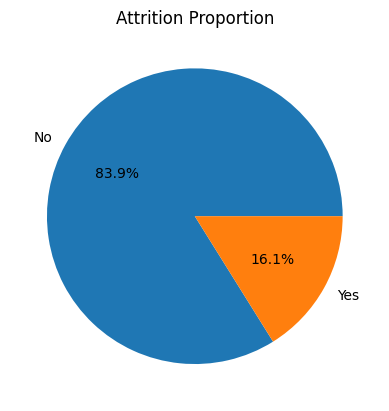

In [3]:
# Calculate the number of employees who have and haven't attrited
attrition_counts = df["Attrition"].value_counts()
print(f"Total Attrited Employees: {attrition_counts['Yes']}")
print(f"Total Non-Attrited Employees: {attrition_counts['No']}")

# Calculate the proportions of employees who have and haven't attrited
proportion = df["Attrition"].value_counts(normalize=True)
proportion.plot(kind='pie', autopct='%1.1f%%', title="Attrition Proportion", ylabel='')
plt.show()

In [6]:

# Group by department and calculate attrition counts
department_attrition = df.groupby(['Department', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each department
department_total = df.groupby('Department')['Attrition'].count()

# Calculate the percentage of attrition for each department
department_attrition_percentage = (department_attrition['Yes'] / department_total) * 100

# Print the results
print("Attrition and Non-Attrition by Department:")
print(department_attrition)
print("\nAttrition Percentage by Department:")
print(department_attrition_percentage)


Attrition and Non-Attrition by Department:
Attrition                 No  Yes
Department                       
Human Resources          132   57
Research & Development  2430  453
Sales                   1137  201

Attrition Percentage by Department:
Department
Human Resources           30.158730
Research & Development    15.712799
Sales                     15.022422
dtype: float64


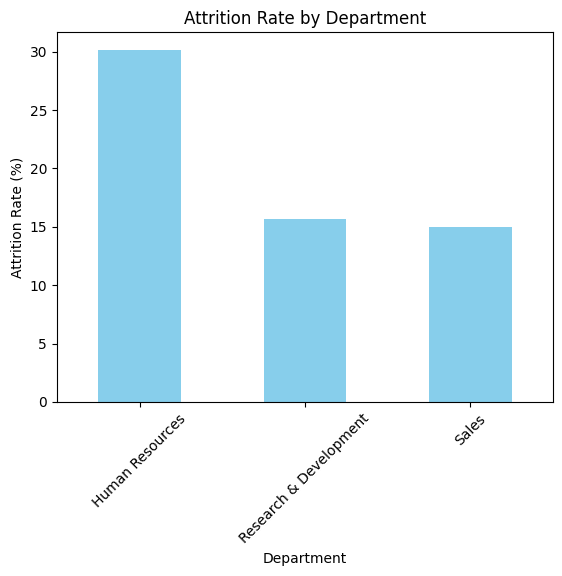

In [4]:
# 🚩 Attrition by Department

# Calculate the proportion of attrited employees within each department
dept_attrition = df.groupby("Department")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
total_employees = df['Department'].value_counts()

# Plot attrition percentage by department
dept_attrition.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Department')
plt.xlabel('Department')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

In [22]:
# 1. 🚩 Filter the dataset for the 'Human Resources' department
# Filter the DataFrame to include only employees in the HR department
hr_employees = df[df['Department'] == 'Human Resources']

# Group by job role and calculate attrition counts
job_role_attrition = hr_employees.groupby(['JobRole', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each job role
job_role_total = hr_employees.groupby('JobRole')['Attrition'].count()

# Calculate the percentage of attrition for each job role
job_role_attrition_percentage = (job_role_attrition['Yes'] / job_role_total) * 100

# Print the results
# Check basic info about the HR department
print(f"Total employees in HR: {len(hr_employees)}")
print(f"Unique Job Roles in HR: {hr_employees['JobRole'].unique()}")
print('------------------------------------------------------------')

# Check attrition rates in HR
attrition_hr = hr_employees['Attrition'].value_counts(normalize=True) * 100
print(f"Attrition rates in HR:\n{attrition_hr}")
print('------------------------------------------------------------')

print("Attrition Percentage by Job Role in HR:")
print('------------------------------------------------------------')

print(job_role_attrition_percentage)


Total employees in HR: 189
Unique Job Roles in HR: ['Sales Representative' 'Laboratory Technician' 'Manager'
 'Manufacturing Director' 'Human Resources' 'Sales Executive'
 'Research Scientist' 'Healthcare Representative' 'Research Director']
------------------------------------------------------------
Attrition rates in HR:
Attrition
No     69.84127
Yes    30.15873
Name: proportion, dtype: float64
------------------------------------------------------------
Attrition Percentage by Job Role in HR:
------------------------------------------------------------
JobRole
Healthcare Representative    33.333333
Human Resources                    NaN
Laboratory Technician        46.153846
Manager                      33.333333
Manufacturing Director       25.000000
Research Director                  NaN
Research Scientist            8.333333
Sales Executive              44.444444
Sales Representative               NaN
dtype: float64


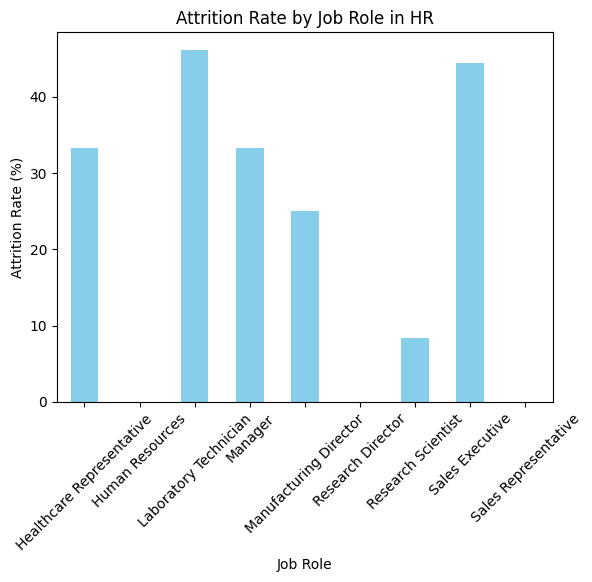

In [24]:

import matplotlib.pyplot as plt
# Plot attrition rate for each role in HR
job_role_attrition_percentage.plot(kind='bar', color='skyblue')
plt.title('Attrition Rate by Job Role in HR')
plt.xlabel('Job Role')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()
## Laboratory Technician AND Sales Executive   are highest attrition rate


In [28]:

import pandas as pd
# Filter the DataFrame to include only employees in the HR department
df_hr = df[df['Department'] == 'Human Resources']

# Create income buckets for HR employees
df_hr['income_buckets'] = pd.cut(df_hr["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000],
                                 labels=['Below 40K', '40K-80K', '80K-120K', '120K-160K', 'Above 160K'])

# Group by income bucket and attrition, then count
income_attrition_counts = df_hr.groupby(['income_buckets', 'Attrition'])['Attrition'].count().unstack()

# Print the counts
print("Monthly Income Bucket Counts in HR (by Attrition):")
print(income_attrition_counts)


Monthly Income Bucket Counts in HR (by Attrition):
Attrition       No  Yes
income_buckets         
Below 40K       54   18
40K-80K         54   33
80K-120K        12    3
120K-160K        3    0
Above 160K       9    3


<ipython-input-28-4e87586a25c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr['income_buckets'] = pd.cut(df_hr["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000],
<ipython-input-28-4e87586a25c8>:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition_counts = df_hr.groupby(['income_buckets', 'Attrition'])['Attrition'].count().unstack()


<ipython-input-25-0542fb58174b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hr['income_buckets'] = pd.cut(df_hr["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000],
<ipython-input-25-0542fb58174b>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition_hr = df_hr.groupby('income_buckets')['Attrition'].value_counts(normalize=True).loc[:, 'Yes'] * 100


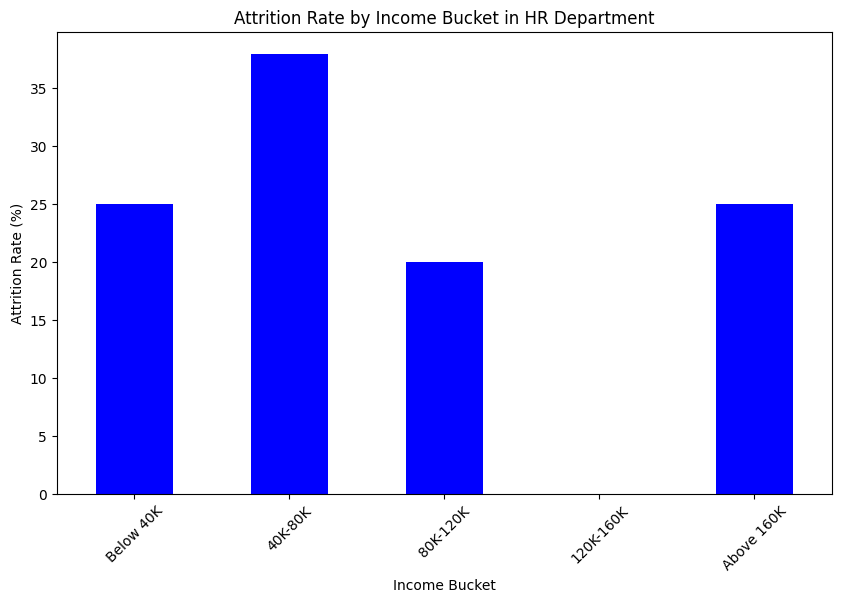

In [25]:
# Create income buckets for HR employees
df_hr['income_buckets'] = pd.cut(df_hr["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000],
                                 labels=['Below 40K', '40K-80K', '80K-120K', '120K-160K', 'Above 160K'])

# Group by income bucket and calculate attrition rates
income_attrition_hr = df_hr.groupby('income_buckets')['Attrition'].value_counts(normalize=True).loc[:, 'Yes'] * 100

# Plot attrition by income level within HR
plt.figure(figsize=(10, 6))
income_attrition_hr.plot(kind='bar', color='blue')
plt.title('Attrition Rate by Income Bucket in HR Department')
plt.xlabel('Income Bucket')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

#### Insights and Recommendations to Reduce HR Department Attrition by 15%
###    1. General Attrition Overview:
Total Employees in HR: 189
Attrition Rate:
Yes (Attrited): 30.16%
No (Non-Attrited): 69.84%
This means that 30.16% of HR employees have left the company, which is significantly higher than the average attrition rate across other departments.

### 2. Attrition by Monthly Income:
Below 40K: 18 employees attrited (25% attrition rate)
40K-80K: 33 employees attrited (37.93% attrition rate)
80K-120K: 3 employees attrited (20% attrition rate)
120K-160K: 0 employees attrited (0% attrition rate)
Above 160K: 3 employees attrited (25% attrition rate)
##### >> Key Insight:
The 40K-80K income bracket has the highest attrition rate at 37.93%, followed by the Below 40K income bracket at 25%.
Higher-income employees (above 120K) have a significantly lower attrition rate, with no attrition in the 120K-160K range.
##### >> Recommendation:
Target compensation review for employees in the 40K-80K and below 40K income brackets. Since most attrition occurs in these brackets, consider offering competitive salaries, performance-based bonuses, or other financial incentives to employees in these groups.
Implement salary progression plans for employees in lower income brackets, as it may help improve retention for those feeling undercompensated.
### 3. Attrition by Job Role:
Healthcare Representative: 33.33%
Laboratory Technician: 46.15%
Manager: 33.33%
Manufacturing Director: 25%
Research Scientist: 8.33%
Sales Executive: 44.44%
Human Resources, Research Director, Sales Representative: NaN (no data, possibly no attrition)
#### >> Key Insight:
The Laboratory Technician and Sales Executive roles exhibit the highest attrition rates at 46.15% and 44.44%, respectively.
Managers and Healthcare Representatives also show higher-than-average attrition rates at 33.33%.
#### >>Recommendation:
Conduct exit interviews for employees in high-attrition roles (e.g., Laboratory Technicians, Sales Executives, and Managers) to identify specific issues causing turnover.
Offer training and development programs for employees in these roles to improve their job satisfaction and opportunities for growth. For example, provide career development paths for Laboratory Technicians and Sales Executives to move into managerial positions or other growth opportunities within the organization.
Focus on role-specific interventions such as mentorship programs or cross-training to improve retention in these high-attrition job roles.

In [30]:
# 🚩 Attrition by Monthly Income (for all employees)

# Create income buckets for all employees
df["income_buckets"] = pd.cut(df["MonthlyIncome"], bins=[0, 40000, 80000, 120000, 160000, 200000],
                              labels=['Below 40K', '40K-80K', '80K-120K', '120K-160K', 'Above 160K'])
# Group by income bucket and attrition, then count
income_attrition_counts = df.groupby(['income_buckets', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each income bucket
income_bucket_total = df.groupby('income_buckets')['Attrition'].count()

# Calculate the percentage of attrition for each income bucket
income_attrition_percentage = (income_attrition_counts['Yes'] / income_bucket_total) * 100

# Print the results
print("Attrition and Non-Attrition by Income Bucket:")
print(income_attrition_counts)
print("\nAttrition Percentage by Income Bucket:")
print(income_attrition_percentage)




Attrition and Non-Attrition by Income Bucket:
Attrition         No  Yes
income_buckets           
Below 40K       1359  270
40K-80K         1353  285
80K-120K         483   75
120K-160K        177   30
Above 160K       327   51

Attrition Percentage by Income Bucket:
income_buckets
Below 40K     16.574586
40K-80K       17.399267
80K-120K      13.440860
120K-160K     14.492754
Above 160K    13.492063
dtype: float64


<ipython-input-30-ad4520669039>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition_counts = df.groupby(['income_buckets', 'Attrition'])['Attrition'].count().unstack()
<ipython-input-30-ad4520669039>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_bucket_total = df.groupby('income_buckets')['Attrition'].count()


<ipython-input-31-7b872b18b62b>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  income_attrition = df.groupby("income_buckets")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100


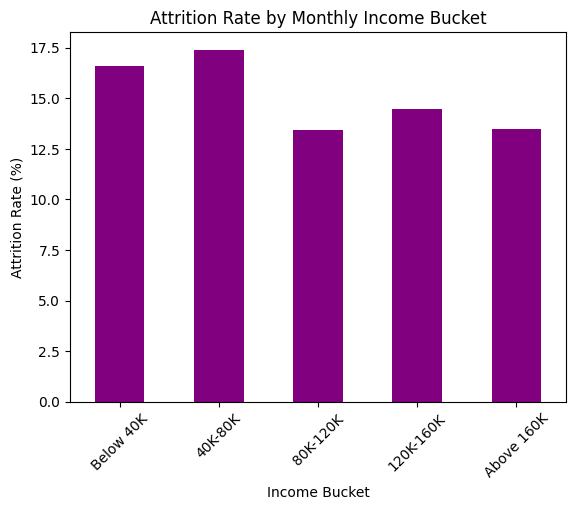

In [31]:
# Calculate attrition percentage within each income bucket
income_attrition = df.groupby("income_buckets")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
income_attrition.plot(kind='bar', color='purple')
plt.title('Attrition Rate by Monthly Income Bucket')
plt.xlabel('Income Bucket')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()



## Insights and Recommendations to Reduce Attrition by 15% Based on Income Buckets
Attrition and Non-Attrition by Income Bucket:
Below 40K:
Non-Attrited: 1,359
Attrited: 270
Attrition Rate: 16.57%
40K-80K:

Non-Attrited: 1,353
Attrited: 285
Attrition Rate: 17.40%
80K-120K:

Non-Attrited: 483
Attrited: 75
Attrition Rate: 13.44%
120K-160K:

Non-Attrited: 177
Attrited: 30
Attrition Rate: 14.49%
Above 160K:

Non-Attrited: 327
Attrited: 51
Attrition Rate: 13.49%
## Key Insights:
40K-80K income bucket has the highest attrition rate at 17.40%, closely followed by the Below 40K bucket at 16.57%.
Higher income brackets, specifically 80K and above, show lower attrition rates ranging from 13.44% to 14.49%.
## Recommendations to Reduce Attrition by 15%:
#### 1. Focus on the 40K-80K Income Bracket:
The 40K-80K income group has the highest attrition rate. Employees in this income bracket may feel undercompensated or have limited career progression opportunities.

Recommendation:

Compensation Review: Conduct a salary review for employees earning between 40K-80K and offer salary increases where appropriate to retain key employees.
Performance-Based Incentives: Consider offering performance bonuses or recognition rewards to this group, especially those who perform well but may not see immediate salary progression.
Career Development Programs: Establish development programs to provide clear career paths, helping these employees see opportunities for advancement within the organization.
#### 2. Retention Strategies for Below 40K Employees:
The Below 40K group has the second-highest attrition rate (16.57%). Employees in this bracket may face financial stress, making them more likely to leave for better-paying opportunities.

Recommendation:

Enhanced Benefits Packages: Provide additional non-monetary benefits, such as healthcare, transportation subsidies, or work-from-home options, to ease financial burdens.
Skill Development and Training: Offer upskilling and training programs to employees in this income bracket, giving them opportunities to transition into higher-paying roles within the company.
#### 3. Leverage Stability in Higher Income Brackets:
Attrition rates in the 80K+ income groups are relatively lower (around 13-14%). These employees tend to stay longer with the company, likely due to higher job satisfaction and compensation.

Recommendation:

Retain High Performers: Ensure that employees in these income brackets remain engaged by offering leadership development and growth opportunities. Providing challenging projects and mentorship roles can help retain them.
Recognition Programs: Implement recognition programs that highlight the achievements of high-income employees, ensuring they feel valued and continue to contribute to the organization.


In [33]:
# prompt: print num of yes and no attrition in business travel and attrition rate

# Group by BusinessTravel and Attrition, then count
business_travel_attrition_counts = df.groupby(['BusinessTravel', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each BusinessTravel category
business_travel_total = df.groupby('BusinessTravel')['Attrition'].count()

# Calculate the percentage of attrition for each BusinessTravel category
business_travel_attrition_percentage = (business_travel_attrition_counts['Yes'] / business_travel_total) * 100

# Print the results
print("Attrition and Non-Attrition by Business Travel:")
print(business_travel_attrition_counts)
print("\nAttrition Percentage by Business Travel:")
print(business_travel_attrition_percentage)


Attrition and Non-Attrition by Business Travel:
Attrition            No  Yes
BusinessTravel              
Non-Travel          414   36
Travel_Frequently   624  207
Travel_Rarely      2661  468

Attrition Percentage by Business Travel:
BusinessTravel
Non-Travel            8.000000
Travel_Frequently    24.909747
Travel_Rarely        14.956855
dtype: float64


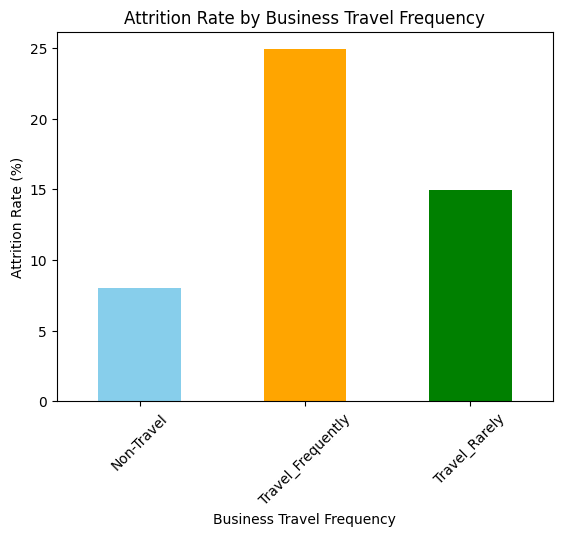

In [32]:
# 🚩 Attrition by Business Travel (including both attrited and non-attrited)

# Calculate attrition percentage based on business travel frequency
business_travel_attrition = df.groupby("BusinessTravel")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
business_travel_attrition.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Attrition Rate by Business Travel Frequency')
plt.xlabel('Business Travel Frequency')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()


## Insights:
###### Attrition Rates by Business Travel:

Employees who travel frequently have the highest attrition rate at approximately 24.91%, indicating potential dissatisfaction with travel demands or work-life balance.
Employees who travel rarely have a moderate attrition rate of about 14.96%.
Non-traveling employees have the lowest attrition rate at 8.00%.

#### Travel Impact:

Frequent travel may lead to burnout or dissatisfaction, contributing to higher attrition. Employees who do not travel tend to stay longer, suggesting that travel policies might need reassessment.
The data suggests a clear correlation between increased travel and attrition, particularly for those traveling frequently.

#### Recommendations:
Review Travel Policies:

Assess the necessity and frequency of travel for employees. Consider reducing the number of trips or offering virtual meeting alternatives where possible to minimize stress.
Implement Employee Feedback Mechanisms:

Conduct surveys or focus groups to gather employee feedback on travel-related issues. Understand their concerns and preferences regarding business travel to address potential dissatisfaction.
Support for Frequent Travelers:

Introduce support programs for employees who travel frequently, such as wellness initiatives, stress management resources, or flexibility in work arrangements after travel.
Enhance Work-Life Balance:

Promote a culture that values work-life balance. Consider implementing policies that allow for additional time off or flexible working arrangements for employees who travel frequently.
Career Development Opportunities:

Ensure that employees who travel have clear career development pathways and recognition for their efforts. This can increase job satisfaction and reduce the likelihood of attrition.
Monitoring and Adjusting:

Continuously monitor attrition rates and employee satisfaction concerning travel. Adjust policies as needed based on ongoing feedback and data analys

In [35]:
# Calculate attrition percentage within each distance bucket
distance_attrition_counts = df.groupby(['distance_buckets', 'Attrition'])['Attrition'].count().unstack()

# Print the counts
print("Attrition Counts by Distance from Home:")
print(distance_attrition_counts)

# Calculate the total number of employees in each distance bucket
distance_bucket_total = df.groupby('distance_buckets')['Attrition'].count()

# Calculate the percentage of attrition for each distance bucket
distance_attrition_percentage = (distance_attrition_counts['Yes'] / distance_bucket_total) * 100

# Print the results
print("\nAttrition Percentage by Distance from Home:")
print(distance_attrition_percentage)


Attrition Counts by Distance from Home:
Attrition           No  Yes
distance_buckets           
< 6 Km            1749  324
6-12 Km            951  201
12-18 Km           351   81
18-24 Km           354   63
> 24 Km            294   42

Attrition Percentage by Distance from Home:
distance_buckets
< 6 Km      15.629522
6-12 Km     17.447917
12-18 Km    18.750000
18-24 Km    15.107914
> 24 Km     12.500000
dtype: float64


<ipython-input-35-a177e5c4513b>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_attrition_counts = df.groupby(['distance_buckets', 'Attrition'])['Attrition'].count().unstack()
<ipython-input-35-a177e5c4513b>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_bucket_total = df.groupby('distance_buckets')['Attrition'].count()


<ipython-input-34-f30422f1fe42>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  distance_attrition = df.groupby("distance_buckets")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100


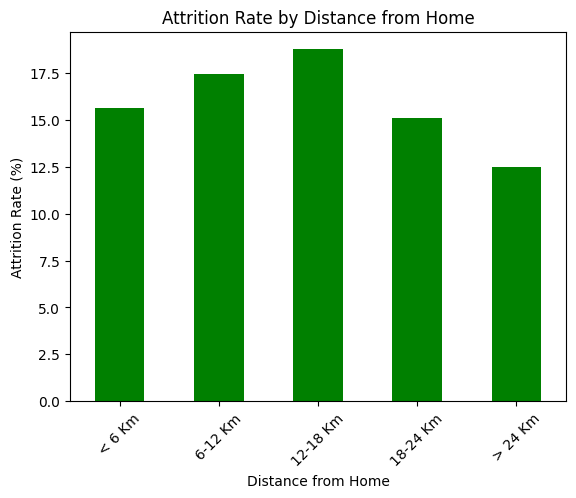

In [34]:
# Create distance buckets for all employees
df["distance_buckets"] = pd.cut(df["DistanceFromHome"], bins=[0, 6, 12, 18, 24, 30],
                                labels=['< 6 Km', '6-12 Km', '12-18 Km', '18-24 Km', '> 24 Km'])

# Calculate attrition percentage within each distance bucket
distance_attrition = df.groupby("distance_buckets")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
distance_attrition.plot(kind='bar', color='green')
plt.title('Attrition Rate by Distance from Home')
plt.xlabel('Distance from Home')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()

### Insights:
Attrition Rates by Distance:

Employees living 12-18 km from the workplace have the highest attrition rate at 18.75%.
The 6-12 km distance bucket also shows a high attrition rate at 17.45%.
The lowest attrition rate is observed in the > 24 km category at 12.50%, suggesting that longer commutes may not be as significant a factor for attrition as mid-range distances.
General Trends:

The data suggests a possible relationship between shorter commutes and higher attrition rates, particularly in the 6-18 km range, indicating that employees may be more sensitive to factors affecting their work experience within these distances.

In [38]:
# 🚩 Attrition by Years at the Company (including all employees)

# Create years at the company buckets for all employees
df["years_buckets"] = pd.cut(df["YearsAtCompany"], bins=[0, 5, 10, 15, 20, 25, 30],
                             labels=['< 5 Years', '5-10 Years', '10-15 Years', '15-20 Years', '20-25 Years', '25-30 Years'])

# Group by 'years_buckets' and 'Attrition' and count occurrences
years_attrition_counts = df.groupby(['years_buckets', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each 'years_buckets' category
years_total = df.groupby('years_buckets')['Attrition'].count()

# Calculate the percentage of attrition for each 'years_buckets' category
years_attrition_percentage = (years_attrition_counts['Yes'] / years_total) * 100

# Print the results
print("Attrition and Non-Attrition by Years at Company:")
print(years_attrition_counts)
print("\nAttrition Percentage by Years at Company:")
print(years_attrition_percentage)



Attrition and Non-Attrition by Years at Company:
Attrition        No  Yes
years_buckets           
< 5 Years      1758  438
5-10 Years     1179  165
10-15 Years     303   21
15-20 Years     201   15
20-25 Years     111   12
25-30 Years      27    0

Attrition Percentage by Years at Company:
years_buckets
< 5 Years      19.945355
5-10 Years     12.276786
10-15 Years     6.481481
15-20 Years     6.944444
20-25 Years     9.756098
25-30 Years     0.000000
dtype: float64


<ipython-input-38-39b8f558676c>:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  years_attrition_counts = df.groupby(['years_buckets', 'Attrition'])['Attrition'].count().unstack()
<ipython-input-38-39b8f558676c>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  years_total = df.groupby('years_buckets')['Attrition'].count()


<ipython-input-39-94d2de1a8a6c>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  years_attrition = df.groupby("years_buckets")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100


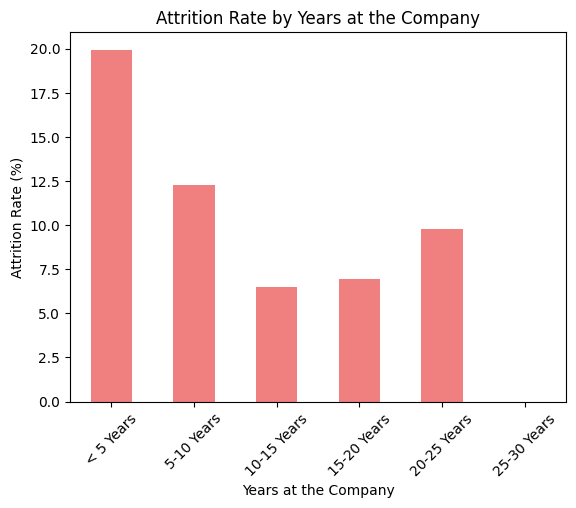

In [39]:
# Calculate attrition percentage within each years-at-company bucket
years_attrition = df.groupby("years_buckets")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
years_attrition.plot(kind='bar', color='lightcoral')
plt.title('Attrition Rate by Years at the Company')
plt.xlabel('Years at the Company')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=45)
plt.show()



### Insights:
#### Attrition Rates by Years at Company:

Employees with less than 5 years at the company have the highest attrition rate at approximately 19.95%. This suggests that newer employees may feel less committed or satisfied.
Attrition rates decrease significantly for employees with 5-10 years (12.28%) and further decline for those with 10-15 years (6.48%) and beyond.
Employees with 25-30 years at the company have a 0% attrition rate, indicating strong loyalty among long-tenured staff.
##### General Trends:

There appears to be a clear trend where attrition decreases with increased tenure. New employees are more likely to leave, while those who stay longer are more likely to remain committed to the organization.
#### Recommendations:

1- Onboarding and Integration:

Enhance onboarding programs to ensure new employees feel welcomed and integrated into the company culture. Provide mentorship opportunities to help them build connections and understand their roles better.
Engagement Strategies:

2- Implement regular engagement surveys to understand the needs and concerns of employees with less than 5 years of tenure. Act on feedback to improve their experience and job satisfaction.
Career Development Opportunities:

3- Offer clear career progression paths and development opportunities for newer employees. Providing training, professional development, and mentorship can enhance their engagement and commitment.
Retention Programs for New Employees:



In [41]:
# prompt: print count of yes and attrition and attrtion rate based on job satisfaction and environment satisfaction

# Group by JobSatisfaction and Attrition, then count
job_satisfaction_attrition_counts = df.groupby(['JobSatisfaction', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each JobSatisfaction category
job_satisfaction_total = df.groupby('JobSatisfaction')['Attrition'].count()

# Calculate the percentage of attrition for each JobSatisfaction category
job_satisfaction_attrition_percentage = (job_satisfaction_attrition_counts['Yes'] / job_satisfaction_total) * 100

# Print the results
print("Attrition and Non-Attrition by Job Satisfaction:")
print(job_satisfaction_attrition_counts)
print("\nAttrition Percentage by Job Satisfaction:")
print(job_satisfaction_attrition_percentage)


# Group by EnvironmentSatisfaction and Attrition, then count
environment_satisfaction_attrition_counts = df.groupby(['EnvironmentSatisfaction', 'Attrition'])['Attrition'].count().unstack()

# Calculate the total number of employees in each EnvironmentSatisfaction category
environment_satisfaction_total = df.groupby('EnvironmentSatisfaction')['Attrition'].count()

# Calculate the percentage of attrition for each EnvironmentSatisfaction category
environment_satisfaction_attrition_percentage = (environment_satisfaction_attrition_counts['Yes'] / environment_satisfaction_total) * 100

# Print the results
print("\nAttrition and Non-Attrition by Environment Satisfaction:")
print(environment_satisfaction_attrition_counts)
print("\nAttrition Percentage by Environment Satisfaction:")
print(environment_satisfaction_attrition_percentage)


Attrition and Non-Attrition by Job Satisfaction:
Attrition          No  Yes
JobSatisfaction           
High             1123  220
Low               663  197
Medium            702  138
Very High        1211  156

Attrition Percentage by Job Satisfaction:
JobSatisfaction
High         16.381236
Low          22.906977
Medium       16.428571
Very High    11.411851
dtype: float64

Attrition and Non-Attrition by Environment Satisfaction:
Attrition                  No  Yes
EnvironmentSatisfaction           
High                     1184  191
Low                       632  213
Medium                    728  128
Very High                1155  179

Attrition Percentage by Environment Satisfaction:
EnvironmentSatisfaction
High         13.890909
Low          25.207101
Medium       14.953271
Very High    13.418291
dtype: float64


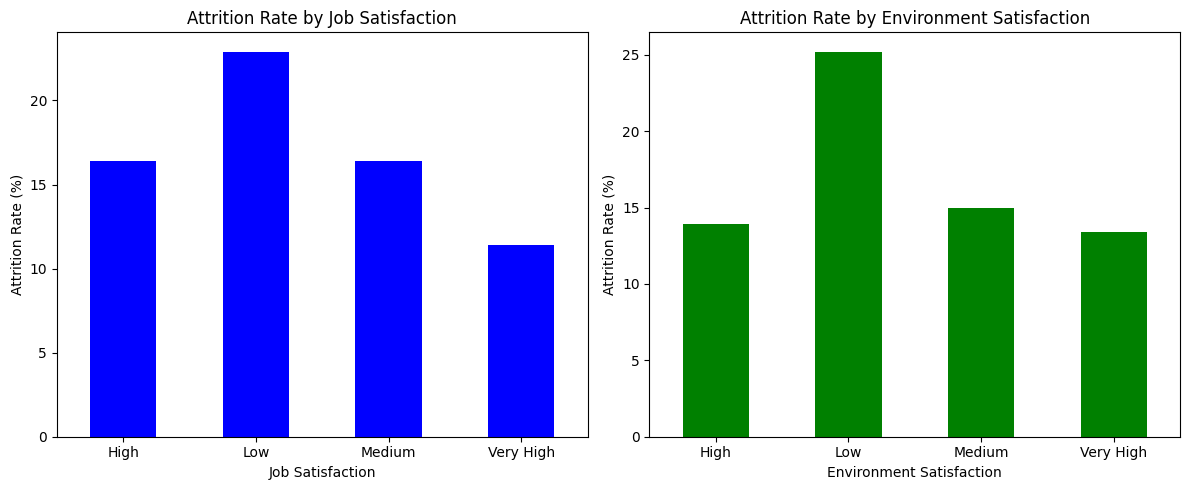

In [43]:
# prompt: plot attrtion rate for job and environment

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
job_satisfaction_attrition = df.groupby("JobSatisfaction")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
job_satisfaction_attrition.plot(kind='bar', color='blue')
plt.title('Attrition Rate by Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.subplot(1, 2, 2)
environment_satisfaction_attrition = df.groupby("EnvironmentSatisfaction")["Attrition"].value_counts(normalize=True).loc[:, "Yes"] * 100
environment_satisfaction_attrition.plot(kind='bar', color='green')
plt.title('Attrition Rate by Environment Satisfaction')
plt.xlabel('Environment Satisfaction')
plt.ylabel('Attrition Rate (%)')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### Insights:

#### Job Satisfaction:
1-Attrition Rates:

Employees with low job satisfaction have the highest attrition rate at 22.91%.
Employees with very high job satisfaction have the lowest attrition rate at 11.41%.
High and medium job satisfaction levels also show significant attrition rates (16.38% and 16.43%, respectively).

2-General Trend:

There is a clear correlation between job satisfaction and attrition rates, with lower satisfaction linked to higher attrition.

#### Environment Satisfaction:

1-Attrition Rates:

Employees with low environment satisfaction have the highest attrition rate at 25.21%, indicating a strong impact of the work environment on retention.
High environment satisfaction results in an attrition rate of 13.89%, while those with very high satisfaction have a slightly lower rate at 13.42%.

2-General Trend:
Similar to job satisfaction, environment satisfaction is inversely related to attrition; as satisfaction decreases, attrition increases.

#### Recommendations:
1-Improve Job Satisfaction:

>> Conduct regular employee surveys to gauge job satisfaction and identify areas for improvement. Address any concerns raised to foster a more positive work experience.
>> Implement recognition programs to acknowledge employee contributions and successes, boosting morale and job satisfaction.
Enhance the Work Environment:

>> Create a supportive and inclusive work environment that addresses employee needs. This could involve improving workplace facilities, offering wellness programs, or providing opportunities for social interaction among colleagues.
Regular Feedback Mechanisms:

